In [1]:
import pandas as pd
from time import time
from poloniex import Poloniex
import matplotlib.pyplot as plt

In [2]:
# make an instance of poloniex.Poloniex
polo = Poloniex()

In [3]:
api = Poloniex(jsonNums=float)

#raw = api.returnChartData('BTC_LTC', period=api.DAY, start=time()-api.YEAR*10)
#raw = api.returnChartData('BTC_LTC', period=300, start=time()-api.MONTH*3)
raw = api.returnChartData('BTC_ETH', period=300, start=time()-api.MONTH*3)
df = pd.DataFrame(raw)

In [4]:
# adjust dates format and set dates as index
df['date'] = pd.to_datetime(df["date"], unit='s')
df.set_index('date', inplace=True)

In [5]:
df.shape

(25921, 7)

In [6]:
df.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2020-07-02 20:05:00,0.024920,0.024921,0.024920,0.024921,8.540362,0.212830,0.024920
2020-07-02 20:10:00,0.024915,0.024915,0.024915,0.024915,0.240925,0.006003,0.024915
2020-07-02 20:15:00,0.024912,0.024915,0.024911,0.024915,29.991973,0.747145,0.024911
2020-07-02 20:20:00,0.024887,0.024910,0.024887,0.024910,16.315978,0.406215,0.024897
2020-07-02 20:25:00,0.024887,0.024887,0.024887,0.024887,16.560176,0.412129,0.024887


In [7]:
df['simpleReturn'] = (df['close']/df['close'].shift(1))-1

In [8]:
df.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage,simpleReturn
date,,,,,,,,
2020-07-02 20:05:00,0.024920,0.024921,0.024920,0.024921,8.540362,0.212830,0.024920,0.000221
2020-07-02 20:10:00,0.024915,0.024915,0.024915,0.024915,0.240925,0.006003,0.024915,-0.000220
2020-07-02 20:15:00,0.024912,0.024915,0.024911,0.024915,29.991973,0.747145,0.024911,-0.000101
2020-07-02 20:20:00,0.024887,0.024910,0.024887,0.024910,16.315978,0.406215,0.024897,-0.001033
2020-07-02 20:25:00,0.024887,0.024887,0.024887,0.024887,16.560176,0.412129,0.024887,0.000000


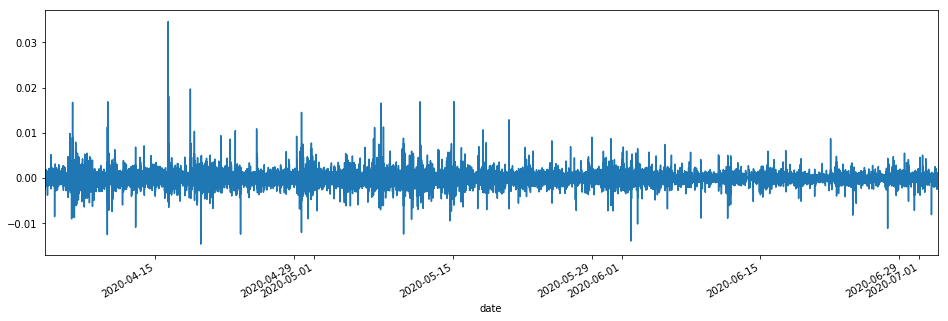

In [9]:
df['simpleReturn'].plot(figsize=(16,5));